In [7]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Introduction to Pandas

## From the Pandas documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###
http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set up Pandas default params

In [10]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [11]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.18.1
Numpy version: 1.11.1


In [13]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. Dataframes

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

In [5]:
# So, what is a Pandas Dataframe

In [17]:
?pd.Series # to get docs

In [19]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [18]:
pd.DataFrame?

In [20]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD')) 
df1

,A,B,C,D
0,-0.966,1.596,-0.435,-0.521
1,-0.406,0.515,0.169,0.702
2,0.439,2.224,0.653,-2.258
3,-0.204,-0.564,1.471,-1.958
4,0.504,-0.959,0.470,0.867
5,0.222,-0.697,-0.031,1.313


In [21]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({ 'A' : 1., \
                    'B' : pd.Timestamp('20130102'), \
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'), \
                    'D' : np.array([3] * 4,dtype='int32'), \
                    'E' : pd.Categorical(["test","train","test","train"]), \
                    'F' : 'foo' })
df2# for each col, elems must have same data type (since each col is a Series)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Load a data set -- read_*

### "Census Income" dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [23]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

In [24]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Q: What's happening in the above cell?**  

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [25]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info() # 'object' usually is a str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Head

Displays the first few rows in the dataframe

In [26]:
help(df.drop)

Help on method drop in module pandas.core.generic:

drop(labels, axis=0, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed.
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
df.columns # gives index of all cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [29]:
newdf = df.drop('hours_per_week',axis=1) # col axis is 1 (numpy col axis = 0)
# operations do not happen inplace,
# unless flagged inplace = True (so create new df) 
newdf.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'country_of_origin', 'income'],
      dtype='object')

In [31]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Tail

Displays the last few rows in the dataframe

In [35]:
df.tail() # defaults to n = 5

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Sample

Displays a Sample of rows in the dataframe

In [36]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42) # random_state is a seed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Columns

Returns a List of Columns in the dataframe

In [37]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [38]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename columns

In [39]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

In [143]:
# replace a column name {original_key: new_colname, inplace = True} # by default, inplace = False
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K


## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### Describe

Displays summary statistic for each Numerical column

In [40]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts

Counts the number of occurances of each categorical value for the column

In [41]:
df['education']

0            Bachelors
1            Bachelors
2              HS-grad
3                 11th
4            Bachelors
5              Masters
6                  9th
7              HS-grad
8              Masters
9            Bachelors
10        Some-college
11           Bachelors
             ...      
32549     Some-college
32550     Some-college
32551             10th
32552        Assoc-voc
32553          Masters
32554          Masters
32555     Some-college
32556       Assoc-acdm
32557          HS-grad
32558          HS-grad
32559          HS-grad
32560          HS-grad
Name: education, dtype: object

In [42]:
type(df.education)

pandas.core.series.Series

In [43]:
df.education.value_counts() # df.colname.value_counts()

## Also works for numeric columns - treating the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [44]:
type(df.education.value_counts()) # value counts are also a Series

pandas.core.series.Series

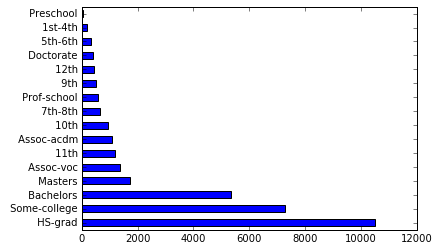

In [47]:
df.education.value_counts().plot(kind = 'barh') # plot the value_counts

In [46]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

40.437455852092995

## Comprehension Question:

What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [48]:
df.hours_per_week

0        40
1        13
2        40
3        40
4        40
5        40
6        16
7        45
8        50
9        40
10       80
11       40
         ..
32549    40
32550    50
32551    40
32552    45
32553    11
32554    40
32555    40
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours_per_week, dtype: int64

In [49]:
# describe a subset
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000
mean,38.582,1077.649,87.304,40.437
std,13.640,7385.292,402.960,12.347
min,17.000,0.000,0.000,1.000
25%,28.000,0.000,0.000,40.000
50%,37.000,0.000,0.000,40.000
75%,48.000,0.000,0.000,45.000
max,90.000,99999.000,4356.000,99.000


### Unique

Returns the unique values for the column

In [50]:
# there's a space before each string in this data
# (common problem with csv files or web-scraped files)
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [51]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [52]:
df["education"] = df.education.str.strip() # strip the leading spaces

In [53]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
df.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [56]:
df.gender.unique()

array([' Male', ' Female'], dtype=object)

In [59]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [58]:
# or use .replace()
df.replace?

In [60]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Selecting rows and columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`


### .ix

* Redirects to `loc` or `iloc` based on input
* **for both**             `.ix[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [62]:
# select a row
df.iloc[3] #iloc[] will remember the indices even if rows are shuffled

age                                   53
workclass                        Private
fnlwgt                            234721
education                           11th
education_num                          7
marital_status        Married-civ-spouse
occupation             Handlers-cleaners
relationship                     Husband
ethnicity                          Black
gender                              Male
capital_gain                           0
capital_loss                           0
hours_per_week                        40
country_of_origin          United-States
income                             <=50K
Name: 3, dtype: object

In [63]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [64]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [66]:
# last 2 rows
df.iloc[-2:] # from last 2 to end

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [67]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head() # every other row, cols at index 2 to 4

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [68]:
# select a row
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


## Question:
Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [70]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [71]:
df.ix[0:2, 2:6] # also, ix[] includes ending index

,fnlwgt,education,education_num,marital_status
0,77516,Bachelors,13,Never-married
1,83311,Bachelors,13,Married-civ-spouse
2,215646,HS-grad,9,Divorced


## Recall:
`df.ix` is primarily label-based, but "falls back" to integer-based (if the columns or index are not numerical).

## Filtering

In [73]:
df.age > 50 # boolean Series (boolean mask)

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
         ...  
32549    False
32550    False
32551    False
32552    False
32553    False
32554     True
32555    False
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, dtype: bool

In [74]:
asd = df[df.age > 50].head(5)
asd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [76]:
# note that sometimes there are leading spaces not visible when printing out the df
df.loc[df.occupation == ' Tech-support', ['age', 'education', 'occupation', 'gender', 'income']].head()

,age,education,occupation,gender,income
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
42,24,Bachelors,Tech-support,Male,<=50K
55,43,Some-college,Tech-support,Male,>50K
64,29,Some-college,Tech-support,Male,<=50K


In [81]:
df[df.occupation == ' Tech-support', ['age', 'education', 'occupation', 'gender', 'income']].head()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [116]:
df[df.occupation == ' Tech-support'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
357,40,Private,96129,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
523,37,Local-gov,186035,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
535,39,Local-gov,207853,12th,8,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K
584,31,Self-emp-not-inc,340939,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [117]:
# df[(df.occupation == ' Tech-support'), ['age', 'education', 'occupation', 'gender', 'income']].head()
df.loc[(df.occupation == ' Tech-support') & (df.gender == 'Male'), 
      ['age', 'education', 'occupation', 'gender', 'income']].head()

,age,education,occupation,gender,income
248,40,Assoc-acdm,Tech-support,Male,>50K
357,40,Assoc-voc,Tech-support,Male,>50K
523,37,Some-college,Tech-support,Male,>50K
535,39,12th,Tech-support,Male,<=50K
584,31,Bachelors,Tech-support,Male,<=50K


In [118]:
df.query('occupation == " Tech-support" and gender == "Male"')
[['age', 'education', 'occupation', 'gender', 'income']].head()

,age,education,occupation,gender,income
248,40,Assoc-acdm,Tech-support,Male,>50K
357,40,Assoc-voc,Tech-support,Male,>50K
523,37,Some-college,Tech-support,Male,>50K
535,39,12th,Tech-support,Male,<=50K
584,31,Bachelors,Tech-support,Male,<=50K


In [83]:
# Filter for only certain Columns
df.ix[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?
# What about df.ix?
# - will fail since iloc only takes integer locations

,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
27,54,Some-college,?,Male,>50K
41,53,Bachelors,Prof-specialty,Male,<=50K
45,57,Bachelors,Prof-specialty,Male,>50K
46,53,HS-grad,Machine-op-inspct,Male,<=50K
67,53,HS-grad,Adm-clerical,Female,>50K


In [88]:
df[df.age > 50].head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K


## Now Filter on Gender

In [89]:
df.gender=='Male'

0         True
1         True
2         True
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11        True
         ...  
32549    False
32550     True
32551     True
32552     True
32553     True
32554     True
32555     True
32556    False
32557     True
32558    False
32559     True
32560    False
Name: gender, dtype: bool

In [90]:
df.query?

In [ ]:
df.loc[df.gender=='Male',] # no cols specified

## Now Filter on Gender and Age between 30 and 40

In [ ]:
(df.gender == 'Male') & (df.age>=30) & (df.age<=40)
# boolean Series

In [100]:
(df.age>=30)&(df.gender=='Male')
df.ix[(df.age>=30)&(df.gender=='Male')&(df.age<=40)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K


In [106]:
df.query('age >=30 and gender=="Male" and age<=40').head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K


In [111]:
df.query('age >=30 and gender=="Male" and age<=40')[['age', 'education', 'occupation', 'gender', 'income']]

,age,education,occupation,gender,income
0,39,Bachelors,Adm-clerical,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Male,<=50K
10,37,Some-college,Exec-managerial,Male,>50K
11,30,Bachelors,Prof-specialty,Male,>50K
13,32,Assoc-acdm,Sales,Male,<=50K
14,40,Assoc-voc,Craft-repair,Male,>50K
15,34,7th-8th,Transport-moving,Male,<=50K
17,32,HS-grad,Machine-op-inspct,Male,<=50K
18,38,11th,Sales,Male,<=50K
20,40,Doctorate,Prof-specialty,Male,>50K


## Find Nulls

In [120]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income


## Fill nulls

In [121]:
# construct a df of null items
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [122]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [ ]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000) # fill null with something like mean or median

In [ ]:
# fillna does not do it inplace unless you specify
null_df

In [123]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [124]:
null_df.fillna('random_string')

,column1
0,1.0
1,2.0
2,4.0
3,2.0


## Drop nulls

In [125]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [127]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [128]:
# .isnull() and .notnull() does opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [129]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [130]:
df.groupby('relationship').count()
# extre 'relationship' row is just the grouping indicator

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
relationship,,,,,,,,,,,,,,
Husband,4291,4291,4291,4291,4291,4291,4291,4291,4291,4291,4291,4291,4291,4291
Not-in-family,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
Other-relative,120,120,120,120,120,120,120,120,120,120,120,120,120,120
Own-child,425,425,425,425,425,425,425,425,425,425,425,425,425,425
Unmarried,251,251,251,251,251,251,251,251,251,251,251,251,251,251
Wife,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
df.groupby('relationship')

In [133]:
type(df.groupby('relationship').count())

pandas.core.frame.DataFrame

In [137]:
df.groupby('relationship').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
relationship,,,,,,
Husband,35.160,191550.110,10.485,1401.141,118.986,45.756
Not-in-family,34.656,200466.788,10.365,982.311,94.836,44.567
Other-relative,34.058,207031.625,9.125,367.808,81.067,41.950
Own-child,34.087,192617.713,9.553,173.146,59.739,41.619
Unmarried,34.629,204274.076,9.582,368.570,45.920,42.371
Wife,36.000,74791.000,13.000,0.000,0.000,60.000


In [135]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,34.858,202806.418,6.0,59.381,120.575,43.582
11th,34.500,196485.022,7.0,358.494,79.298,43.140
12th,34.881,213614.136,8.0,609.390,69.593,42.966
1st-4th,34.704,292845.741,2.0,136.074,96.407,43.852
5th-6th,34.809,255111.468,3.0,315.447,0.000,41.723
7th-8th,34.049,217647.000,4.0,279.134,42.549,41.744
9th,34.747,223769.667,5.0,202.364,16.677,42.535
Assoc-acdm,35.133,205169.415,12.0,571.173,124.331,44.855
Assoc-voc,35.083,175449.602,11.0,586.953,57.267,44.706


In [138]:
# groupby education and age, then look at mean hours per week and capital gain
df.groupby(['education','age',])[['hours_per_week','capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         30           40.273         0.000
             31           39.867       140.333
             32           44.286         0.000
             33           38.438         0.000
             34           43.625         0.000
             35           54.455         0.000
             36           46.500         0.000
             37           44.417         0.000
             38           44.545       292.455
             39           44.091       239.545
             40           42.308         0.000
11th         30           41.625         0.000
...                          ...           ...
Prof-school  40           48.611     14329.778
Some-college 30           43.579       470.851
             31           43.828       593.893
             32           45.473       457.054
             33           43.945       278.349
             34           44.992       419.722
             35           45.325       602.592
             36           46.194      1619.935
             37           45.524       340.381
             38           45.636       569.918
             39           47.466       412.045
             40           43.980       621.307

[170 rows x 2 columns]

In [151]:
df.groupby(['education','age']).hours_per_week.mean()

education     age
10th          30     40.273
              31     39.867
              32     44.286
              33     38.438
              34     43.625
              35     54.455
              36     46.500
              37     44.417
              38     44.545
              39     44.091
              40     42.308
11th          30     41.625
                      ...  
Prof-school   40     48.611
Some-college  30     43.579
              31     43.828
              32     45.473
              33     43.945
              34     44.992
              35     45.325
              36     46.194
              37     45.524
              38     45.636
              39     47.466
              40     43.980
Name: hours_per_week, dtype: float64

In [140]:
# reset index (this turn the aggregration into a DataFrame) <- this flattens the data
df.groupby(['education','age',])[['hours_per_week','capital_gain']].mean().reset_index()

,education,age,hours_per_week,capital_gain
0,10th,30,40.273,0.000
1,10th,31,39.867,140.333
2,10th,32,44.286,0.000
3,10th,33,38.438,0.000
4,10th,34,43.625,0.000
5,10th,35,54.455,0.000
6,10th,36,46.500,0.000
7,10th,37,44.417,0.000
8,10th,38,44.545,292.455
9,10th,39,44.091,239.545


In [150]:
df.groupby(['income', 'native_country']).age.count()

income  native_country     
 <=50K   ?                      110
         Cambodia                 5
         Canada                  11
         China                   14
         Columbia                 7
         Cuba                     5
         Dominican-Republic       6
         Ecuador                  5
         El-Salvador             14
         England                 13
         France                   3
         Germany                 15
                               ... 
 >50K    Mexico                  15
         Nicaragua                1
         Peru                     2
         Philippines             20
         Portugal                 1
         Puerto-Rico              2
         South                    2
         Taiwan                   8
         Thailand                 2
         United-States         1939
         Vietnam                  2
         Yugoslavia               3
Name: age, dtype: int64

In [152]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['median', 'mean'])
# df.groupby(['income', 'native_country']).agg(['count', 'mean'])
# grouped in order of which column is listed first
# group by income, then by native country, then
# agg(regate) computes the count and mean
# returns count and mean (separate cols) for each income and native country

median    mean
income native_country                     
 <=50K  ?                     35.0  34.782
        Cambodia              36.0  36.400
        Canada                36.0  36.455
        China                 35.0  35.071
        Columbia              32.0  33.429
        Cuba                  37.0  36.000
        Dominican-Republic    34.5  34.667
        Ecuador               32.0  32.400
        El-Salvador           34.0  35.143
        England               33.0  33.923
        France                34.0  33.667
        Germany               32.0  32.733
...                            ...     ...
 >50K   Mexico                34.0  34.600
        Nicaragua             39.0  39.000
        Peru                  33.5  33.500
        Philippines           37.5  36.700
        Portugal              37.0  37.000
        Puerto-Rico           34.0  34.000
        South                 32.0  32.000
        Taiwan                34.5  34.750
        Thailand              34.0  34.000
        United-States         36.0  35.548
        Vietnam               30.0  30.000
        Yugoslavia            35.0  35.333

[69 rows x 2 columns]

In [153]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(['education']).hours_per_week.mean()

education
10th            43.785
11th            43.081
12th            43.467
1st-4th         42.500
5th-6th         40.167
7th-8th         41.691
9th             43.065
Assoc-acdm      44.904
Assoc-voc       44.924
Bachelors       46.035
Doctorate       51.579
HS-grad         44.550
Masters         46.765
Preschool       32.000
Prof-school     51.567
Some-college    45.027
Name: hours_per_week, dtype: float64

## Sorting
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [ ]:
pd.__version__

In [154]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income','native_country']).mean().sort_values('age', ascending = True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                    
 >50K   Vietnam        30.000  124933.500         11.000         0.000   
 <=50K  Hungary        30.000  207668.000         13.000         0.000   
        Honduras       30.667  271022.333          6.333         0.000   
        Yugoslavia     31.000  182177.000         13.000         0.000   
 >50K   South          32.000  186261.000         11.500      7512.000   
 <=50K  Taiwan         32.200  123829.400         13.600         0.000   
        Ecuador        32.400  177682.400         11.000         0.000   
        Peru           32.667  334016.667         10.667         0.000   
        Nicaragua      32.714  347692.286         10.857         0.000   
        Germany        32.733  236944.067         10.067       209.133   
        Ireland        32.750  128850.250          9.875         0.000   
        Haiti          32.800  264469.400          9.400         0.000   
...                       ...         ...            ...           ...   
        Cambodia       36.400  128291.000          7.400       294.200   
        Canada         36.455  205089.182         11.273         0.000   
 >50K   Ecuador        36.500  174209.500         11.500         0.000   
        Philippines    36.700  197997.550         12.200      1481.000   
 <=50K  Poland         36.857  193491.143         10.714       714.714   
 >50K   El-Salvador    37.000  218490.000         14.000         0.000   
        Portugal       37.000  161141.000         11.000         0.000   
 <=50K  Scotland       38.000  179668.000          9.000         0.000   
 >50K   Cambodia       38.500  238906.000         13.000      6775.000   
        Italy          39.000  216256.000         13.000         0.000   
        Nicaragua      39.000  423605.000          8.000         0.000   
        Guatemala      40.000  226608.000         10.000         0.000   

                       capital_loss  hours_per_week  
income native_country                                
 >50K   Vietnam               0.000          38.000  
 <=50K  Hungary               0.000          60.000  
        Honduras              0.000          36.667  
        Yugoslavia            0.000          40.000  
 >50K   South               951.000          55.000  
 <=50K  Taiwan                0.000          27.600  
        Ecuador               0.000          46.000  
        Peru                  0.000          40.000  
        Nicaragua             0.000          40.714  
        Germany              72.800          44.533  
        Ireland               0.000          38.000  
        Haiti               348.000          37.200  
...                             ...             ...  
        Cambodia              0.000          40.400  
        Canada              170.545          43.182  
 >50K   Ecuador               0.000          47.500  
        Philippines         193.950          41.850  
 <=50K  Poland              293.000          49.000  
 >50K   El-Salvador           0.000          55.000  
        Portugal              0.000          40.000  
 <=50K  Scotland              0.000          40.000  
 >50K   Cambodia              0.000          40.000  
        Italy                 0.000          60.000  
        Nicaragua          1848.000          40.000  
        Guatemala             0.000          30.000  

[69 rows x 6 columns]

In [157]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
32,<=50K,Scotland,38.000,179668.000,9.000,0.000,0.000,40.000
29,<=50K,Poland,36.857,193491.143,10.714,714.714,293.000,49.000
2,<=50K,Canada,36.455,205089.182,11.273,0.000,170.545,43.182
1,<=50K,Cambodia,36.400,128291.000,7.400,294.200,0.000,40.400
35,<=50K,Trinadad&Tobago,36.333,104498.000,9.333,0.000,0.000,49.333
5,<=50K,Cuba,36.000,247806.800,7.400,0.000,0.000,46.000
12,<=50K,Greece,36.000,184567.500,9.500,0.000,0.000,57.500
22,<=50K,Jamaica,35.667,256062.778,10.556,0.000,0.000,40.556
28,<=50K,Philippines,35.278,197535.222,9.556,0.000,0.000,43.889
8,<=50K,El-Salvador,35.143,287960.714,7.071,224.071,112.786,40.357
